In [10]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
df=pd.read_csv(r'breast-cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [13]:
df = label_encoder(df, "diagnosis")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,84300903,1,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,84348301,1,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,84358402,1,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768
5,843786,1,12.4500,15.7000,82.5700,477.1000,0.1278,0.1700,0.1578,0.0809,0.2087,0.0761,0.3345,0.8902,2.2170,27.1900,0.0075,0.0335,0.0367,0.0114,0.0216,0.0051,15.4700,23.7500,103.4000,741.6000,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
6,844359,1,18.2500,19.9800,119.6000,1040.0000,0.0946,0.1090,0.1127,0.0740,0.1794,0.0574,0.4467,0.7732,3.1800,53.9100,0.0043,0.0138,0.0225,0.0104,0.0137,0.0022,22.8800,27.6600,153.2000,1606.0000,0.1442,0.2576,0.3784,0.1932,0.3063,0.0837
7,84458202,1,13.7100,20.8300,90.2000,577.9000,0.1189,0.1645,0.0937,0.0599,0.2196,0.0745,0.5835,1.3770,3.8560,50.9600,0.0088,0.0303,0.0249,0.0145,0.0149,0.0054,17.0600,28.1400,110.6000,897.0000,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
8,844981,1,13.0000,21.8200,87.5000,519.8000,0.1273,0.1932,0.1859,0.0935,0.2350,0.0739,0.3063,1.0020,2.4060,24.3200,0.0057,0.0350,0.0355,0.0123,0.0214,0.0037,15.4900,30.7300,106.2000,739.3000,0.1703,0.5401,0.5390,0.2060,0.4378,0.1072
9,84501001,1,12.4600,24.0400,83.9700,475.9000,0.1186,0.2396,0.2273,0.0854,0.2030,0.0824,0.2976,1.5990,2.0390,23.9400,0.0071,0.0722,0.0774,0.0143,0.0179,0.0101,15.0900,40.6800,97.6500,711.4000,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075


In [14]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat


In [15]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(num_but_cat)}")

Observations: 569
Variables: 32
Cat_cols: 0
Num_cols: 31
Cat_but_car: 0
num_but_cat: 0


In [16]:
def remove_constant_features_variance_threshold(dataset, drop_labels, target, threshold=0):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using VarianceThreshold
  selected_feature = VarianceThreshold(threshold=threshold)
  selected_feature.fit(X)
  print("Non-Constant Features: ", sum(selected_feature.get_support()))
  constant = X.columns[~selected_feature.get_support()]
  print("Constant Features: ", len(constant))
  feature_names = X.columns[selected_feature.get_support()]
  X = selected_feature.transform(X)
  X = pd.DataFrame(X, columns=feature_names)
  return X

In [17]:
X = remove_constant_features_variance_threshold(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Non-Constant Features:  30
Constant Features:  0


In [18]:
def remove_constant_features_std(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  print("Non-Constant Features: ", len(non_constant_features))
  X.drop(labels=constant_features, axis=1, inplace=True)
  return X

In [19]:
X = remove_constant_features_std(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Constant Features:  0
Non-Constant Features:  30


In [20]:
def remove_constant_features_categorical(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using Categorical Variables
  constant_features = [feature for feature in X.columns if X[feature].nunique() == 1]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].nunique() > 1]
  print("Non-Constant Features: ", len(non_constant_features))
  X.drop(labels=constant_features, axis=1, inplace=True)
  return X

In [21]:
X = remove_constant_features_categorical(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Constant Features:  0
Non-Constant Features:  30


In [22]:
def filter_based_FS(dataset, drop_labels, target, score_funcs, k_features=10, test_size=0.33, plot=True):
    # Load Dataset
    X = dataset.drop(labels=drop_labels, axis=1)
    y = dataset[target]

    # Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    # Scale the features to be non-negative
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    plt.figure(figsize=(15, 5))
    top_features = {}

    for idx, score_func in enumerate(score_funcs, start=1):
        # Filter Based Methods
        model = SelectKBest(score_func=score_func, k=k_features)
        model.fit(X_train_scaled, y_train.values.ravel())

        # Extract feature scores
        scores = pd.Series(model.scores_, index=X_train.columns).sort_values(ascending=False)
        top_features[score_func.__name__] = scores.index.tolist()  # Store all features

        # Plot Results
        plt.subplot(1, len(score_funcs), idx)
        top_features_k = scores.head(k_features)
        plt.bar(top_features_k.index, top_features_k)
        plt.title(f"Top {k_features} Features for {score_func.__name__}")
        plt.xlabel("Feature Index")
        plt.ylabel("Score")
        plt.xticks(rotation='vertical')

    plt.tight_layout()
    plt.show()

    # Print top features for each method
    for method, features in top_features.items():
        print(f"Top {k_features} features for {method}:")
        for i, feature in enumerate(features[:k_features], start=1):
            print(f"{i}. {feature}")
        print("=" * 50)

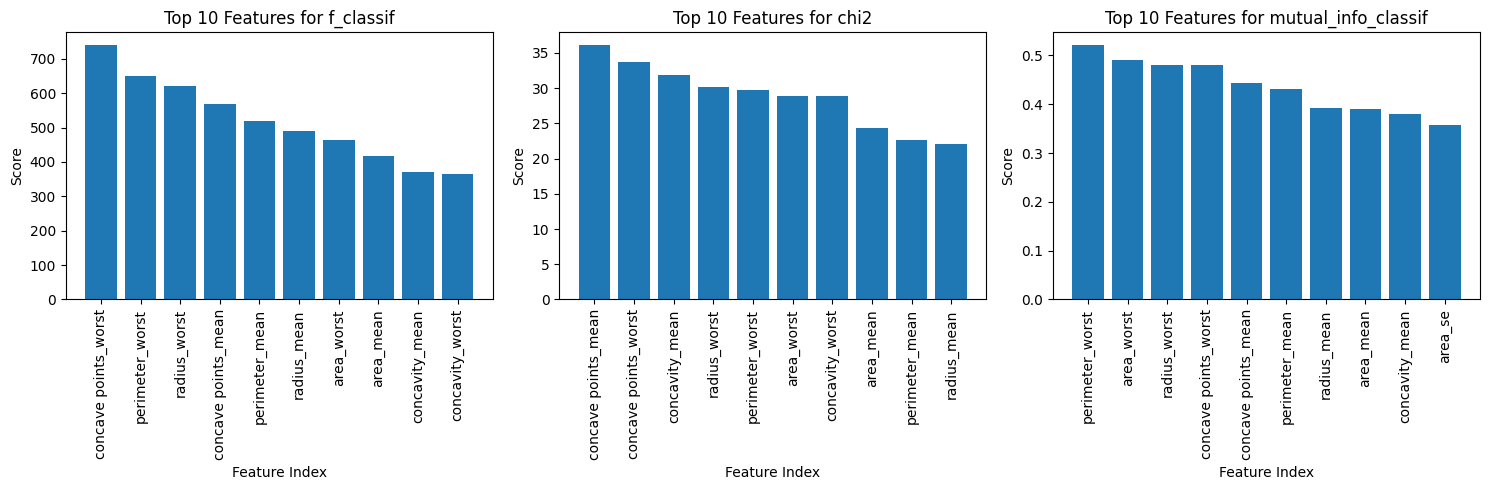

Top 10 features for f_classif:
1. concave points_worst
2. perimeter_worst
3. radius_worst
4. concave points_mean
5. perimeter_mean
6. radius_mean
7. area_worst
8. area_mean
9. concavity_mean
10. concavity_worst
Top 10 features for chi2:
1. concave points_mean
2. concave points_worst
3. concavity_mean
4. radius_worst
5. perimeter_worst
6. area_worst
7. concavity_worst
8. area_mean
9. perimeter_mean
10. radius_mean
Top 10 features for mutual_info_classif:
1. perimeter_worst
2. area_worst
3. radius_worst
4. concave points_worst
5. concave points_mean
6. perimeter_mean
7. radius_mean
8. area_mean
9. concavity_mean
10. area_se


In [23]:
filter_based_FS(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], score_funcs=[f_classif, chi2, mutual_info_classif])

In [24]:
def remove_duplicated_features(dataset, drop_labels, target, report_duplicated_feature_pairs=False):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Using own function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  all_var = list(X.columns)
  non_duplicated_features = [var for var in all_var if var not in duplicated_features]
  print("Non-Duplicated Features: ", len(non_duplicated_features))
  X = X[duplicated_feature_pairs.keys()]

  if report_duplicated_feature_pairs:
    print(50*"#")
    for feature in duplicated_feature_pairs.keys():
      if len(duplicated_feature_pairs[feature]) > 0:
        print(feature, duplicated_feature_pairs[feature])
  return X


In [25]:
X = remove_duplicated_features(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], report_duplicated_feature_pairs=True)

Duplicated Features:  0
Non-Duplicated Features:  30
##################################################


In [26]:
def basic_feature_selection_pipeline(dataset, drop_labels, target):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Remove Constant Features Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  X.drop(labels=constant_features, axis=1, inplace=True)

  # Remove Quasi Constant Features Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)
  # Remove Duplicated Features Using My Own Function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  all_var = list(X.columns)
  non_duplicated_features = [var for var in all_var if var not in duplicated_features]
  print("All Features For Train: ", len(non_duplicated_features))
  X_train = X[duplicated_feature_pairs.keys()]

  return X


In [27]:
X = basic_feature_selection_pipeline(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Constant Features:  0
Quasi-Constant Features:  0
Duplicated Features:  0
All Features For Train:  30


In [28]:
def high_correlated_cols(dataset, drop_labels, target, corr_th=0.8, plot=True, remove_correlated_variables=False):
    # Load Dataset
    X = dataset.drop(labels=drop_labels, axis=1)
    y = dataset[target]
    num_cols = [col for col in X.columns if X[col].dtypes in ["uint8", "int64", "float64"]]
    corr = X[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if drop_list == []:
        print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

    if plot:
        sns.set(rc={'figure.figsize': (6, 3)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()

    if remove_correlated_variables:
      new_df = X.drop(drop_list, axis=1)
      sns.set(rc={'figure.figsize': (6,3)})
      sns.heatmap(new_df.corr(), cmap="RdBu", annot=True, fmt=".2f")
      plt.show()

    return drop_list, new_df


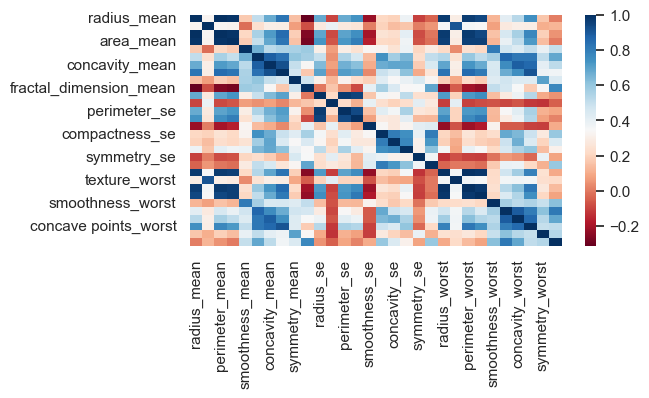

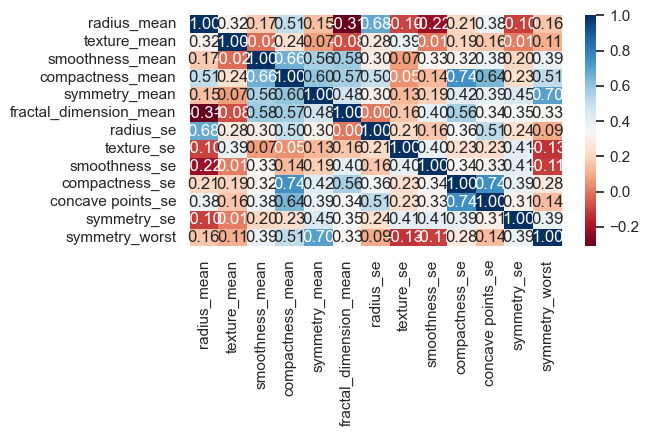

In [29]:
drop_list, new_df = high_correlated_cols(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], remove_correlated_variables=True)


In [30]:
def basic_feature_selection_pipeline(dataset, drop_labels, target, corr_th=0.8):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Remove Constant Features Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  X.drop(labels=constant_features, axis=1, inplace=True)

  # Remove Quasi Constant Features Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)

  # Remove Duplicated Features Using My Own Function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  X = X[duplicated_feature_pairs.keys()]

  # Remove Highly Correlated Features
  num_cols = [col for col in X.columns if X[col].dtypes in ["uint8", "int64", "float64"]]
  corr = X[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
  X = X.drop(drop_list, axis=1)
  print("Correlated Features: ", len(drop_list))
  print("All Features For Train: ", X.shape[1])

  return X

In [31]:
X = basic_feature_selection_pipeline(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

Constant Features:  0
Quasi-Constant Features:  0
Duplicated Features:  0
Correlated Features:  17
All Features For Train:  13


In [32]:
def filter_based_FS(dataset, drop_labels, target, score_funcs, k_features=10, test_size=0.33, plot=True):
    # Load Dataset
    X = dataset.drop(labels=drop_labels, axis=1)
    y = dataset[target]

    # Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    # Scale the features to be non-negative
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    plt.figure(figsize=(15, 5))
    top_features = {}

    for idx, score_func in enumerate(score_funcs, start=1):
        # Filter Based Methods
        model = SelectKBest(score_func=score_func, k=k_features)
        model.fit(X_train_scaled, y_train.values.ravel())

        # Extract feature scores
        scores = pd.Series(model.scores_, index=X_train.columns).sort_values(ascending=False)
        top_features[score_func.__name__] = scores.index.tolist()  # Store all features

        # Plot Results
        plt.subplot(1, len(score_funcs), idx)
        top_features_k = scores.head(k_features)
        plt.bar(top_features_k.index, top_features_k)
        plt.title(f"Top {k_features} Features for {score_func.__name__}")
        plt.xlabel("Feature Index")
        plt.ylabel("Score")
        plt.xticks(rotation='vertical')

    plt.tight_layout()
    plt.show()

    # Print top features for each method
    for method, features in top_features.items():
        print(f"Top {k_features} features for {method}:")
        for i, feature in enumerate(features[:k_features], start=1):
            print(f"{i}. {feature}")
        print("=" * 50)


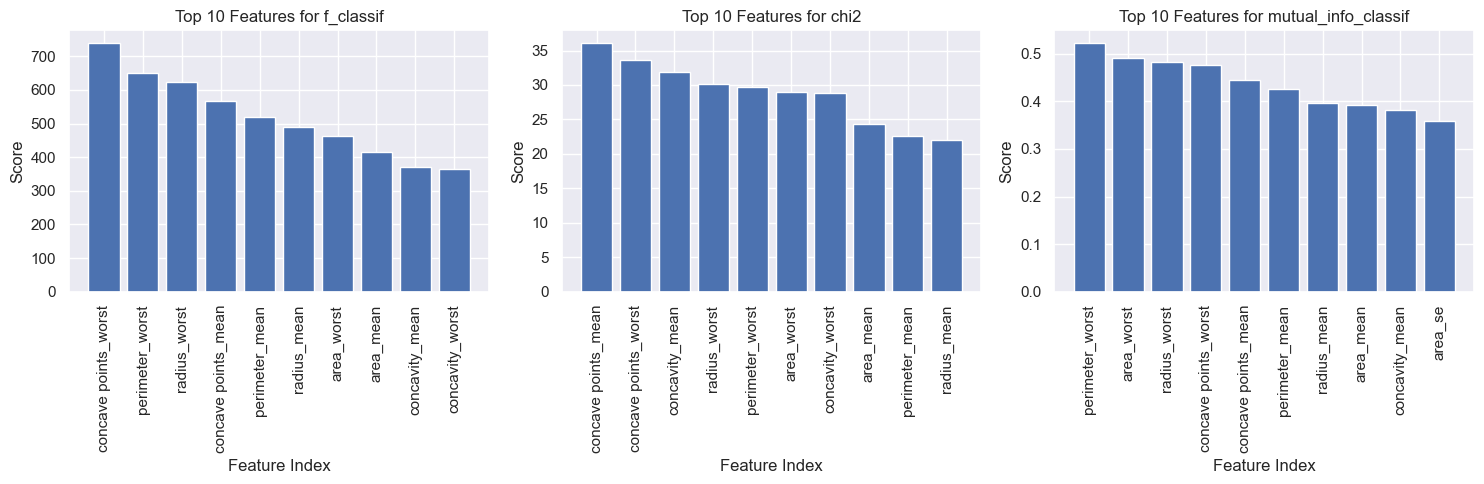

Top 10 features for f_classif:
1. concave points_worst
2. perimeter_worst
3. radius_worst
4. concave points_mean
5. perimeter_mean
6. radius_mean
7. area_worst
8. area_mean
9. concavity_mean
10. concavity_worst
Top 10 features for chi2:
1. concave points_mean
2. concave points_worst
3. concavity_mean
4. radius_worst
5. perimeter_worst
6. area_worst
7. concavity_worst
8. area_mean
9. perimeter_mean
10. radius_mean
Top 10 features for mutual_info_classif:
1. perimeter_worst
2. area_worst
3. radius_worst
4. concave points_worst
5. concave points_mean
6. perimeter_mean
7. radius_mean
8. area_mean
9. concavity_mean
10. area_se


In [33]:
filter_based_FS(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], score_funcs=[f_classif, chi2, mutual_info_classif])

In [34]:
def filter_and_feature_selection(dataset, drop_labels, target, score_funcs, k_features=15, corr_th=0.9):
  # Load Dataset
  X = dataset.drop(labels=drop_labels, axis=1)
  y = dataset[target]

  # Remove Constant Features Using Standard Deviation
  constant_features = [feature for feature in X.columns if X[feature].std() == 0]
  print("Constant Features: ", len(constant_features))
  non_constant_features = [feature for feature in X.columns if X[feature].std() != 0]
  X.drop(labels=constant_features, axis=1, inplace=True)

  # Remove Quasi Constant Features Using Standard Deviation
  quasi_constant_features = []
  non_quasi_constant_features = []
  for feature in X.columns:
    predominant = X[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.998:
      quasi_constant_features.append(feature)
    else:
      non_quasi_constant_features.append(feature)
  print("Quasi-Constant Features: ", len(quasi_constant_features))
  X.drop(labels=quasi_constant_features, axis=1, inplace=True)

  # Remove Duplicated Features Using My Own Function
  duplicated_feature_pairs = {}
  duplicated_features = []
  for i in range(0, len(X.columns)):
    feature_1 = X.columns[i]
    if feature_1 not in duplicated_features:
      duplicated_feature_pairs[feature_1] = []
      for feature_2 in X.columns[i + 1:]:
        if X[feature_1].equals(X[feature_2]):
          duplicated_feature_pairs[feature_1].append(feature_2)
          duplicated_features.append(feature_2)

  print("Duplicated Features: ", len(duplicated_features))
  X = X[duplicated_feature_pairs.keys()]

  # Remove Highly Correlated Features
  num_cols = [col for col in X.columns if X[col].dtypes in ["uint8", "int64", "float64"]]
  corr = X[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
  X = X.drop(drop_list, axis=1)
  print("Correlated Features: ", len(drop_list))
  print(f"All Features Before Select {k_features} Feature: ", X.shape[1])

  # Scale the features to be non-negative
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  plt.figure(figsize=(15, 5))
  top_features = {}

  for idx, score_func in enumerate(score_funcs, start=1):
      # Filter Based Methods
      model = SelectKBest(score_func=score_func, k=k_features)
      model.fit(X_scaled, y.values.ravel())
      # Extract feature scores
      scores = pd.Series(model.scores_, index=X.columns).sort_values(ascending=False)
      top_features[score_func.__name__] = scores.index.tolist()  # Store all features

      # Plot Results
      plt.subplot(1, len(score_funcs), idx)
      top_features_k = scores.head(k_features)
      plt.bar(top_features_k.index, top_features_k)
      plt.title(f"Top {k_features} Features for {score_func.__name__}")
      plt.xlabel("Feature Index")
      plt.ylabel("Score")
      plt.xticks(rotation='vertical')

  plt.tight_layout()
  plt.show()
    # Print top features for each method
  for method, features in top_features.items():
      print(f"Top {k_features} features for {method}:")
      for i, feature in enumerate(features[:k_features], start=1):
          print(f"{i}. {feature}")
      print("=" * 50)

  return top_features, k_features

Constant Features:  0
Quasi-Constant Features:  0
Duplicated Features:  0
Correlated Features:  10
All Features Before Select 15 Feature:  20


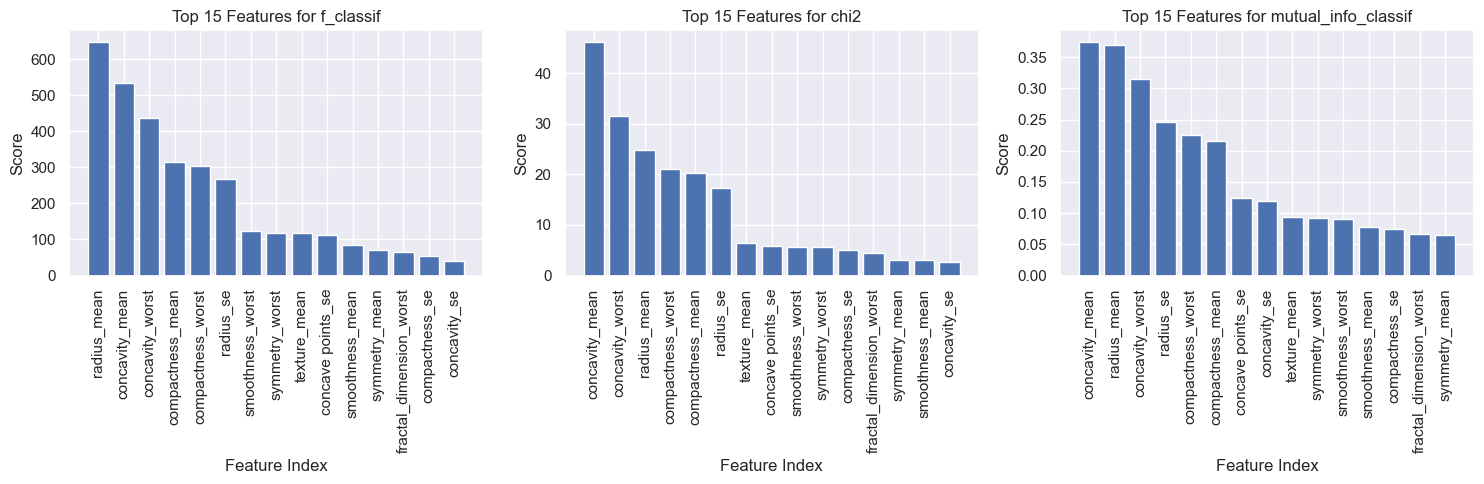

Top 15 features for f_classif:
1. radius_mean
2. concavity_mean
3. concavity_worst
4. compactness_mean
5. compactness_worst
6. radius_se
7. smoothness_worst
8. symmetry_worst
9. texture_mean
10. concave points_se
11. smoothness_mean
12. symmetry_mean
13. fractal_dimension_worst
14. compactness_se
15. concavity_se
Top 15 features for chi2:
1. concavity_mean
2. concavity_worst
3. radius_mean
4. compactness_worst
5. compactness_mean
6. radius_se
7. texture_mean
8. concave points_se
9. smoothness_worst
10. symmetry_worst
11. compactness_se
12. fractal_dimension_worst
13. symmetry_mean
14. smoothness_mean
15. concavity_se
Top 15 features for mutual_info_classif:
1. concavity_mean
2. radius_mean
3. concavity_worst
4. radius_se
5. compactness_worst
6. compactness_mean
7. concave points_se
8. concavity_se
9. texture_mean
10. symmetry_worst
11. smoothness_worst
12. smoothness_mean
13. compactness_se
14. fractal_dimension_worst
15. symmetry_mean


In [35]:
top_features,  k_features = filter_and_feature_selection(df, drop_labels=["id", "diagnosis"], target=["diagnosis"], score_funcs=[f_classif, chi2, mutual_info_classif])

In [44]:
def RF_Model(X, y, test_size=0.3, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    rf_model = RandomForestClassifier().fit(X_train, y_train.values.ravel())
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()

    if results:
        acc_train = accuracy_score(y_train, rf_model.predict(X_train))
        acc_test = accuracy_score(y_test, rf_model.predict(X_test))
        r2 = rf_model.score(X, y)
        r2_train = rf_model.score(X_train, y_train)
        r2_test = rf_model.score(X_test, y_test)
        cv_train = cross_val_score(rf_model, X_train, y_train, cv=cv).mean()
        cv_test = cross_val_score(rf_model, X_test, y_test, cv=cv).mean()
        print("##################### Accuracy & R2 Metrics ######################")
        print("Accuracy_train: ", "%.3f" % acc_train)
        print("Accuracy_test: ", "%.3f" % acc_test)
        print("R2: ", "%.3f" % r2)
        print("R2_train: ", "%.3f" % r2_train)
        print("R2_test: ", "%.3f" % r2_test)
        print("Cross Validation Score(Train): ", "%.3f" % cv_train)
        print("Cross Validation Score(Test): ", "%.3f" % cv_test)

    if conf_matrix:
        print("##################### Confusion Matrix(Train) ######################")
        cm_train = confusion_matrix(y_train, rf_model.predict(X_train))
        print(cm_train)
        print("##################### Confusion Matrix(Test) ######################")
        cm_test = confusion_matrix(y_test, rf_model.predict(X_test))
        print(cm_test)

        # Plot confusion matrix
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', ax=axs[0])
        axs[0].set_title("Confusion Matrix (Train)")
        sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', ax=axs[1])
        axs[1].set_title("Confusion Matrix (Test)")
        plt.show()

    if c_report:
        print("###################### Classification Report(Train) ######################")
        print(classification_report(y_train, rf_model.predict(X_train)))
        print("###################### Classification Report(Test) ######################")
        print(classification_report(y_test, rf_model.predict(X_test)))

    if roc:
        print("###################### Roc Auc Score(Train) ######################")
        rf_roc_auc_train = roc_auc_score(y_train, rf_model.predict(X_train))
        print("Roc Auc Train: ", "%.3f" % rf_roc_auc_train)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, rf_model.predict_proba(X_train)[:,1])

        print("###################### Roc Auc Score(Test) ######################")
        rf_roc_auc_test = roc_auc_score(y_test, rf_model.predict(X_test))
        print("Roc Auc Test: ", "%.3f" % rf_roc_auc_test)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

        # Plot ROC curves
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].plot(fpr_train, tpr_train, label='AUC (area = %.3f)' % rf_roc_auc_train)
        axs[0].plot([0, 1], [0, 1], 'r--')
        axs[0].set_xlim([0.0, 1.0])
        axs[0].set_ylim([0.0, 1.05])
        axs[0].set_xlabel('False Positive Ratio')
        axs[0].set_ylabel('True Positive Ratio')
        axs[0].set_title('ROC (Train)')

        axs[1].plot(fpr_test, tpr_test, label='AUC (area = %.3f)' % rf_roc_auc_test)
        axs[1].plot([0, 1], [0, 1], 'r--')
        axs[1].set_xlim([0.0, 1.0])
        axs[1].set_ylim([0.0, 1.05])
        axs[1].set_xlabel('False Positive Ratio')
        axs[1].set_ylabel('True Positive Ratio')
        axs[1].set_title('ROC (Test)')

        plt.legend(loc="lower right")
        plt.show()

    end_time = time.time()
    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    print(f"Function execution time: {minutes} minutes {seconds} seconds")

    return rf_model

In [37]:
import joblib
def RF_Model_With_FS(dataframe, drop_labels, target):
    # Load Dataset
    X = dataframe.drop(labels=drop_labels, axis=1)
    y = dataframe[target]

    # Call random forest for prediction without feature selection
    print(50*"#", "Results for Random Forest Without Feature Selection", 50*"#")
    rf_model = RF_Model(X, y, results=True, conf_matrix=True, c_report=True, roc=True)

    # Call filter_and_feature_selection method to get feature selections
    top_features, k_features = filter_and_feature_selection(dataframe, drop_labels=drop_labels, target=target, score_funcs=[f_classif, chi2, mutual_info_classif])
    print(top_features)

    # Call RF_Model method for each feature selection
    rf_models = {}
    for method, features in top_features.items():
        print(50*"#", f"Results for {method}", 50*"#")
        print(features)
        X_selected = top_features[method][0:k_features]
        X_selected = X.loc[:, X_selected]
        rf_model = RF_Model(X_selected, y, results=True, conf_matrix=True, c_report=True, roc=True)
        rf_models[method] = rf_model
        model_filename = f'rf_model_{method}.joblib'
        joblib.dump(rf_model, model_filename)
        print(f"Trained model saved as {model_filename}")

    return rf_models

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
rf_model = RF_Model_With_FS(df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

In [40]:
!pip install mlxtend
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import normalize
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
def SequentialFeatureSelectionWarpper(X, y, k_features=10, test_size=0.30, scoring="roc_auc", forward=True):
    # Fill missing data
    df_without_nan = X.apply(lambda x: x.fillna(x.value_counts().index[0]))

    # Encoding
    feature_names = df_without_nan.columns.tolist()
    data_encoder = OrdinalEncoder()
    input_encoded = data_encoder.fit_transform(df_without_nan)
    input_normalized = normalize(input_encoded, axis=0)
    X = pd.DataFrame(input_normalized, columns=feature_names)

    # Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    selected_features_all = []
    # Feature selection
    model_wrapper = SequentialFeatureSelector(RandomForestClassifier(), k_features, scoring=scoring, forward=forward)
    mymodel = model_wrapper.fit(X_train, y_train.values.ravel())
    selected_features_idx = list(mymodel.k_feature_idx_)
    selected_features_names = [feature_names[idx] for idx in selected_features_idx]
    selected_features_all.append(selected_features_names)

    return selected_features_all

In [42]:
def RF_Model_With_SFS(top_features, k_features, dataframe, drop_labels, target, forward=True):
    # Load Dataset
    X = dataframe.drop(labels=drop_labels, axis=1)
    y = dataframe[target]

    selected_features = []
    for method, features in top_features.items():
        print(50*"#", f"Results for {method}", 50*"#")
        X_selected = top_features[method][0:k_features]
        X_selected = X.loc[:, X_selected]
        X_selected = SequentialFeatureSelectionWarpper(X_selected, y, forward=forward)
        selected_features.append(X_selected)
        print(selected_features)

    selected_features = [i[0] for i in selected_features]
    for i in selected_features:
        X_selected = X.loc[:, i]
        rf_model = RF_Model(X_selected, y, results=True, conf_matrix=True, c_report=True, roc=True)
        model_filename = f'rf_model_{i}.joblib'
        joblib.dump(rf_model, model_filename)
        print(f"Trained model saved as {model_filename}")

    return rf_model

################################################## Results for f_classif ##################################################
[[['radius_mean', 'concavity_mean', 'radius_se', 'smoothness_worst', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se']]]
################################################## Results for chi2 ##################################################
[[['radius_mean', 'concavity_mean', 'radius_se', 'smoothness_worst', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se']], [['concavity_mean', 'concavity_worst', 'radius_mean', 'radius_se', 'texture_mean', 'smoothness_worst', 'compactness_se', 'fractal_dimension_worst', 'smoothness_mean', 'concavity_se']]]
################################################## Results for mutual_info_classif ##################################################
[[['radius_mean', 'concavity_mean', 'radius_se', 'smoothness_worst', '

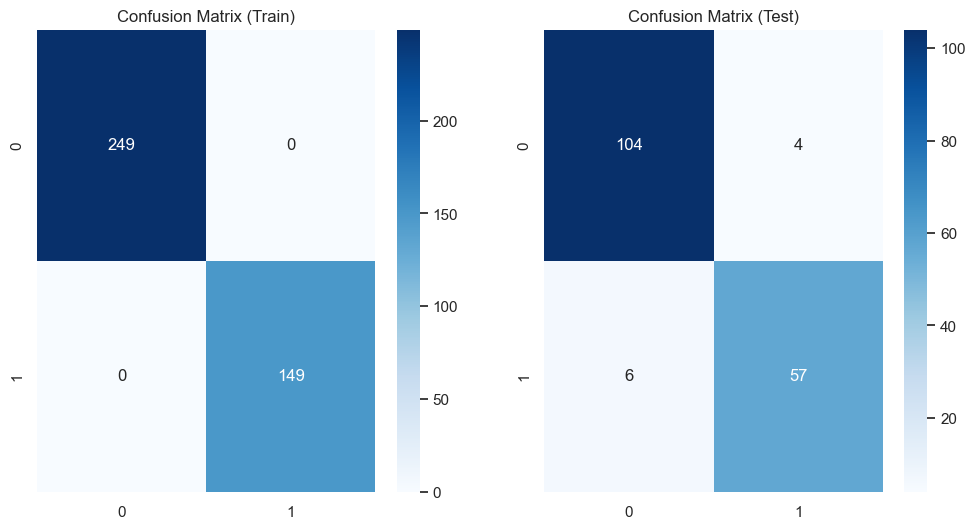

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.934


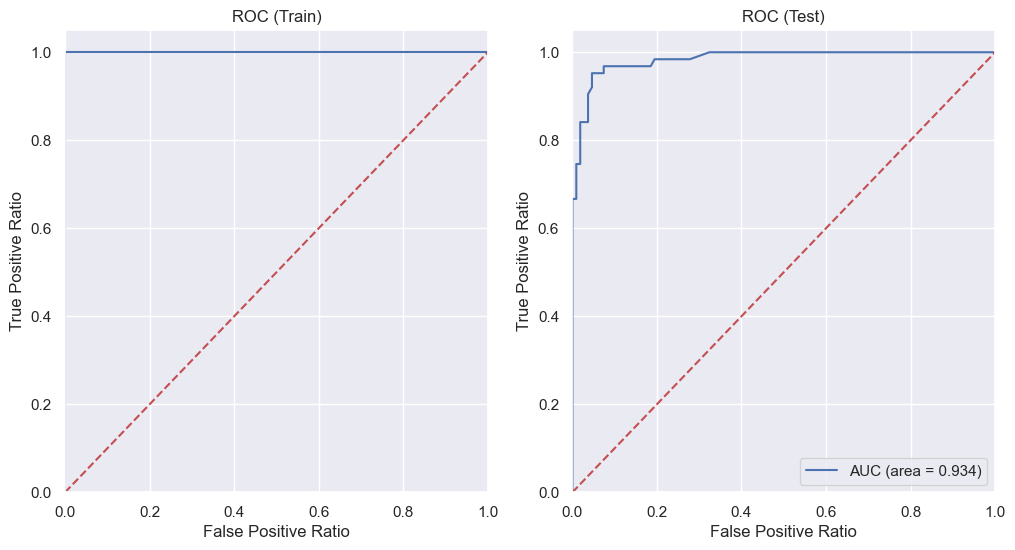

Function execution time: 0 minutes 4 seconds
Trained model saved as rf_model_['radius_mean', 'concavity_mean', 'radius_se', 'smoothness_worst', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se'].joblib
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.942
R2:  0.982
R2_train:  1.000
R2_test:  0.942
Cross Validation Score(Train):  0.957
Cross Validation Score(Test):  0.918
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[105   3]
 [  7  56]]


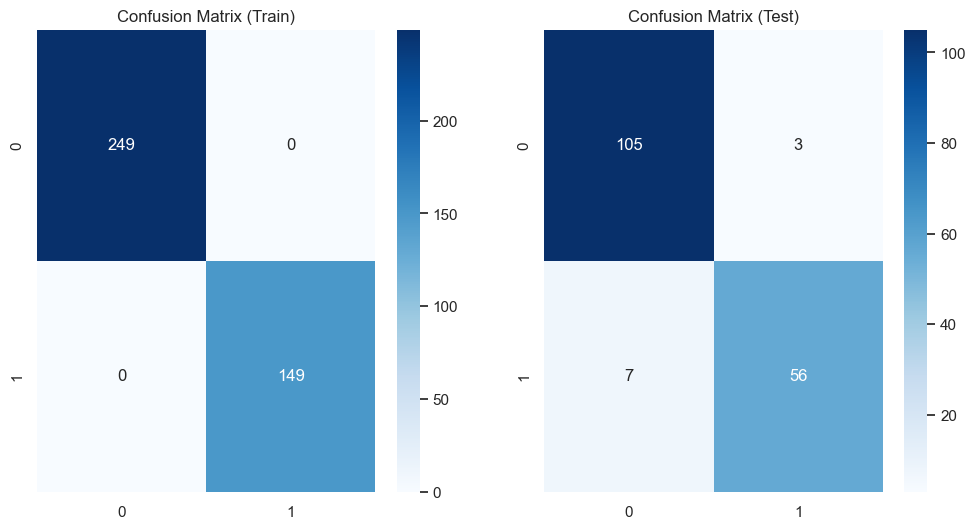

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.931


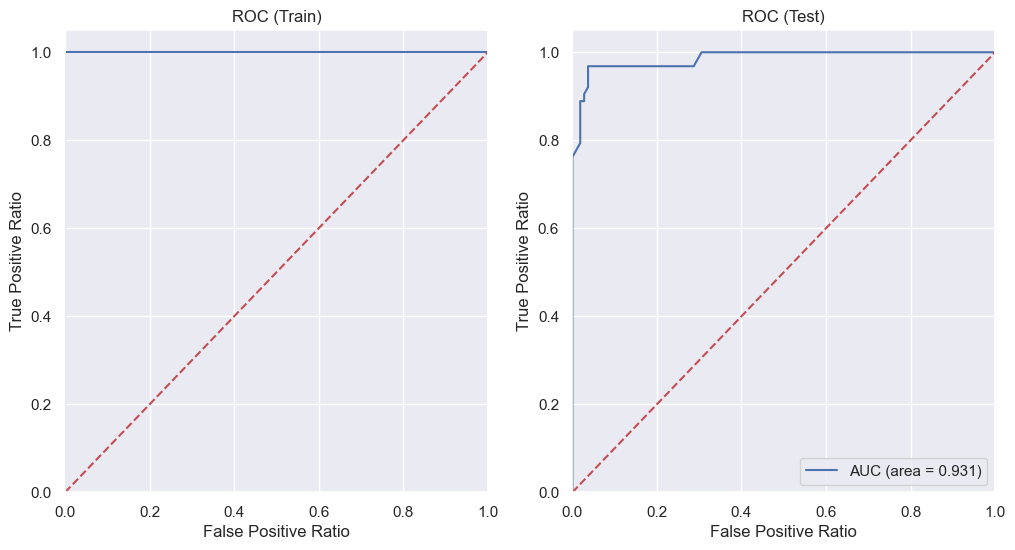

Function execution time: 0 minutes 4 seconds
Trained model saved as rf_model_['concavity_mean', 'concavity_worst', 'radius_mean', 'radius_se', 'texture_mean', 'smoothness_worst', 'compactness_se', 'fractal_dimension_worst', 'smoothness_mean', 'concavity_se'].joblib
##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.947
R2:  0.984
R2_train:  1.000
R2_test:  0.947
Cross Validation Score(Train):  0.947
Cross Validation Score(Test):  0.918
##################### Confusion Matrix(Train) ######################
[[249   0]
 [  0 149]]
##################### Confusion Matrix(Test) ######################
[[104   4]
 [  5  58]]


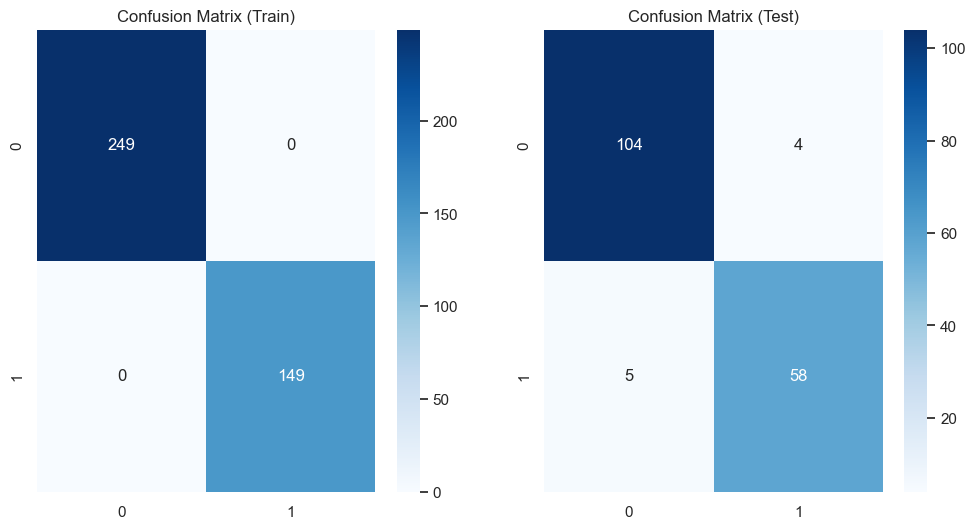

###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

###################### Roc Auc Score(Train) ######################
Roc Auc Train:  1.000
###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.942


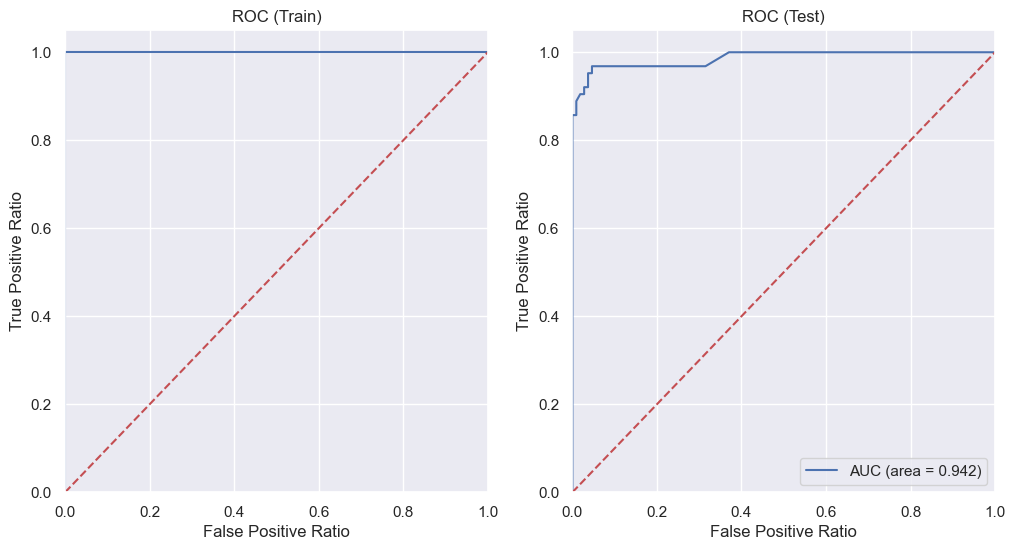

Function execution time: 0 minutes 4 seconds
Trained model saved as rf_model_['concavity_mean', 'radius_mean', 'concavity_worst', 'radius_se', 'texture_mean', 'smoothness_worst', 'smoothness_mean', 'compactness_se', 'fractal_dimension_worst', 'symmetry_mean'].joblib


RandomForestClassifier()

In [45]:
RF_Model_With_SFS(top_features, k_features, df, drop_labels=["id", "diagnosis"], target=["diagnosis"])

In [49]:
import joblib
import pandas as pd

# Load the Random Forest model from the joblib file
rf_model = joblib.load(r'rf1.joblib')

# Read your test data from CSV file
test_data = pd.read_csv(r'breast-cancer.csv')

# Select only the specified features
selected_features = ['concavity_mean', 'concavity_worst', 'radius_mean', 
                     'radius_se', 'texture_mean', 'smoothness_worst', 
                     'compactness_se', 'fractal_dimension_worst', 
                     'smoothness_mean', 'concavity_se']
test_data_selected = test_data[selected_features]

# Make predictions using the loaded model on the test data
predictions = rf_model.predict(test_data_selected)

# Concatenate predictions with the selected features DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])
result_df = pd.concat([test_data_selected, predictions_df], axis=1)

# Print the result
result_df

,concavity_mean,concavity_worst,radius_mean,radius_se,texture_mean,smoothness_worst,compactness_se,fractal_dimension_worst,smoothness_mean,concavity_se,Prediction
0,0.3001,0.7119,17.9900,1.0950,10.3800,0.1622,0.0490,0.1189,0.1184,0.0537,1
1,0.0869,0.2416,20.5700,0.5435,17.7700,0.1238,0.0131,0.0890,0.0847,0.0186,1
2,0.1974,0.4504,19.6900,0.7456,21.2500,0.1444,0.0401,0.0876,0.1096,0.0383,1
3,0.2414,0.6869,11.4200,0.4956,20.3800,0.2098,0.0746,0.1730,0.1425,0.0566,1
4,0.1980,0.4000,20.2900,0.7572,14.3400,0.1374,0.0246,0.0768,0.1003,0.0569,1
5,0.1578,0.5355,12.4500,0.3345,15.7000,0.1791,0.0335,0.1244,0.1278,0.0367,1
6,0.1127,0.3784,18.2500,0.4467,19.9800,0.1442,0.0138,0.0837,0.0946,0.0225,1
7,0.0937,0.2678,13.7100,0.5835,20.8300,0.1654,0.0303,0.1151,0.1189,0.0249,1
8,0.1859,0.5390,13.0000,0.3063,21.8200,0.1703,0.0350,0.1072,0.1273,0.0355,1
9,0.2273,1.1050,12.4600,0.2976,24.0400,0.1853,0.0722,0.2075,0.1186,0.0774,1


In [ ]:
result_df.to_csv('result_df.csv')